In [1]:
import sys
import os

# 1. Ensure the 'src' folder is reachable
sys.path.append(os.path.abspath(os.path.join('..')))

from src.io import load_data

# 2. Load the data into the 'df' variable
df = load_data(
    "../data/france_deaths_clean.csv",
    "../data/france_population_clean.csv"
)

In [2]:
from src.mortality_models import poisson_mx
from src.lee_carter import prepare_mx_matrix, fit_lee_carter

df = poisson_mx(df)
log_mx = prepare_mx_matrix(df, sex="Female", age_min=0, age_max=90)

c:\Users\PC-HP\Desktop\insea\Mortality Project\src\mortality_models.py:27: RuntimeWarning: divide by zero encountered in divide
  df["mx_lower"] = lambda_lower / E
c:\Users\PC-HP\Desktop\insea\Mortality Project\src\mortality_models.py:28: RuntimeWarning: divide by zero encountered in divide
  df["mx_upper"] = lambda_upper / E


In [3]:
ax, bx, kt = fit_lee_carter(log_mx)

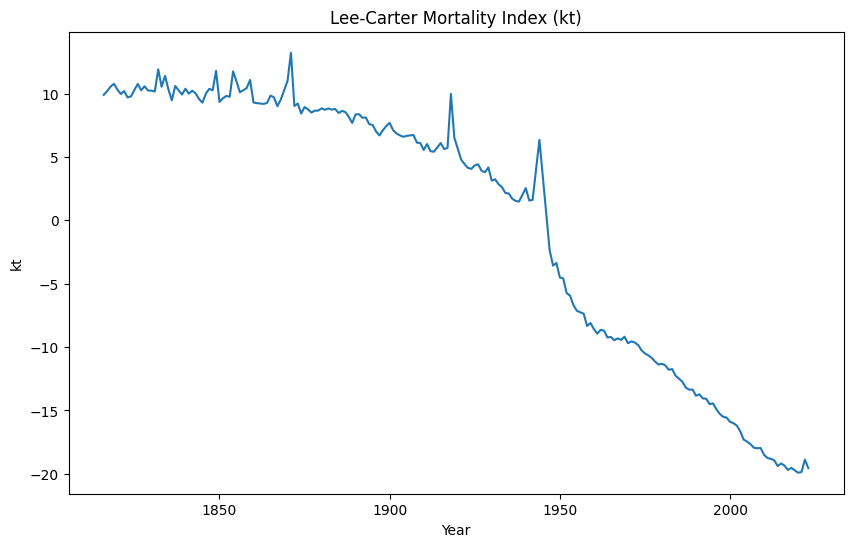

In [4]:
import matplotlib.pyplot as plt

# If beta is mostly negative, flip both bx and kt


plt.figure(figsize=(10,6))
plt.plot(log_mx.columns, kt)
plt.title("Lee-Carter Mortality Index (kt)")
plt.xlabel("Year")
plt.ylabel("kt")
plt.show()

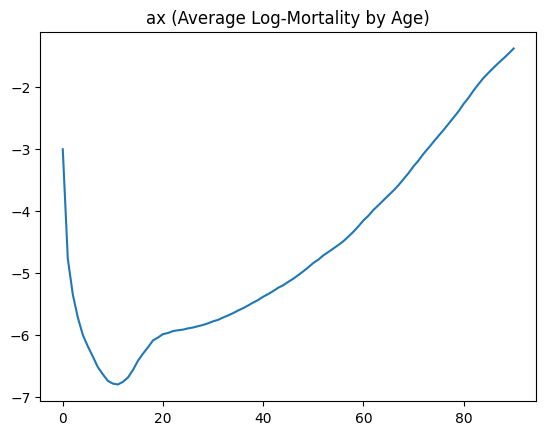

In [17]:
plt.plot(log_mx.index, ax)
plt.title("ax (Average Log-Mortality by Age)")
plt.show()


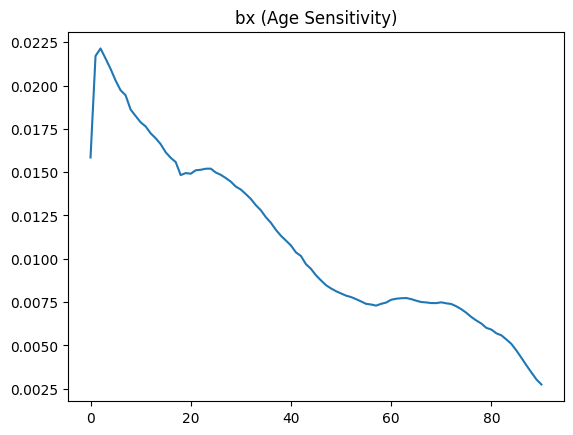

In [18]:
plt.plot(log_mx.index, bx)
plt.title("bx (Age Sensitivity)")
plt.show()